In [ ]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import os

## Load the cats VS dogs Dataset

In [ ]:
#Run the cells of this section to get the data in (x_train,y_train), (x_test,y_test)

In [ ]:
!gdown 1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
!gdown 1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
!gdown 1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
!gdown 1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN

!unzip /content/cats_test.zip
!unzip /content/cats_train.zip
!unzip /content/dogs_test.zip
!unzip /content/dogs_train.zip

Downloading...
From: https://drive.google.com/uc?id=1A1XEEAPgohMOO8U1LATdbzd_YVPZgezP
To: /content/cats_test.zip
100% 10.2M/10.2M [00:00<00:00, 27.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A037vjTlIZw-Ac2twnUULAm5_AkivKV6
To: /content/cats_train.zip
100% 21.1M/21.1M [00:00<00:00, 121MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1A1AFSaX9kLrSC9dfBRfN8Fuo_G98zTmn
To: /content/dogs_test.zip
100% 11.8M/11.8M [00:00<00:00, 201MB/s]
Downloading...
From: https://drive.google.com/uc?id=1A-sbHXWcY19Foz9LysuxbpW-B2J_JmMN
To: /content/dogs_train.zip
100% 24.5M/24.5M [00:00<00:00, 255MB/s]
Archive:  /content/cats_test.zip
replace cats_and_dogs_small/test/cats/cat.1699.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cats_and_dogs_small/test/cats/cat.1699.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1502.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1984.jpg  
  inflating: cats_and_dogs_small/test/cats/cat.1612.jpg  
  inflating: cats_and_dogs_

In [ ]:
cats_train_path = "/content/cats_and_dogs_small/train/cats"
cats_test_path = "/content/cats_and_dogs_small/test/cats"
dogs_train_path = "/content/cats_and_dogs_small/train/dogs"
dogs_test_path = "/content/cats_and_dogs_small/test/dogs"
train_dir = "/content/cats_and_dogs_small/train/"
testing_dir = "/content/cats_and_dogs_small/test/"

cats_train_images = [f for f in os.listdir(cats_train_path)]
cats_test_images = [f for f in os.listdir(cats_test_path)]
dogs_train_images = [f for f in os.listdir(dogs_train_path)]
dogs_test_images = [f for f in os.listdir(dogs_test_path)]

print(len(cats_train_images))
print(len(cats_test_images))
print(len(dogs_train_images))
print(len(dogs_test_images))

1000
500
1000
500


In [ ]:
cats_train = np.ndarray((len(cats_train_images),150,150,3), dtype= np.int32)
cats_test = np.ndarray((len(cats_test_images),150,150,3), dtype= np.int32)
dogs_train = np.ndarray((len(dogs_train_images),150,150,3), dtype= np.int32)
dogs_test = np.ndarray((len(dogs_test_images),150,150,3), dtype= np.int32)

for i,img_name in enumerate(cats_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/cats/" + img_name).resize((150,150))
  cats_train[i] = np.asarray(img)

for i,img_name in enumerate(cats_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/cats/" + img_name).resize((150,150))
  cats_test[i] = np.asarray(img)

for i,img_name in enumerate(dogs_train_images):
  img = Image.open("/content/cats_and_dogs_small/train/dogs/" + img_name).resize((150,150))
  dogs_train[i] = np.asarray(img)

for i,img_name in enumerate(dogs_test_images):
  img = Image.open("/content/cats_and_dogs_small/test/dogs/" + img_name).resize((150,150))
  dogs_test[i] = np.asarray(img)

In [ ]:
training_images = np.concatenate((cats_train,dogs_train), axis=0)
testing_images = np.concatenate((cats_test,dogs_test), axis=0)

training_labels = np.concatenate((np.ones(len(cats_train),dtype= np.int32), \
                                  np.zeros(len(dogs_train),dtype= np.int32)))
testing_labels = np.concatenate((np.ones(len(cats_test),dtype= np.int32), \
                                 np.zeros(len(dogs_test),dtype= np.int32)))

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)

(2000, 150, 150, 3)
(1000, 150, 150, 3)
(2000,)
(1000,)


In [ ]:
training_shuffler = np.random.permutation(len(training_images))
x_train = training_images[training_shuffler]
y_train = training_labels[training_shuffler].reshape(2000,-1)

testing_shuffler = np.random.permutation(len(testing_images))
x_test = testing_images[testing_shuffler]
y_test = testing_labels[testing_shuffler].reshape(1000,-1)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 150, 150, 3)
(2000, 1)
(1000, 150, 150, 3)
(1000, 1)


## Exploratory Data Analysis

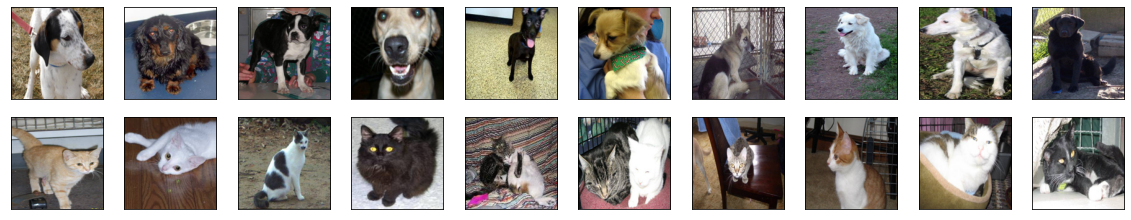

In [ ]:
#show 10 images from each class
fig = plt.figure(figsize=(20,20))
for label in range(2):
  for example in range(10):
    fig.add_subplot(10, 10, 1 + example + label*10, xticks=[], yticks=[])
    plt.imshow(x_train[np.where(y_train == label)[0]][example])
plt.show()

## Data preproceesing

In [ ]:
#Normalize images pixels values in range [0,1]
x_train_DL = (x_train.astype('float32') / 255).reshape(2000,-1)
x_test_DL = (x_test.astype('float32') / 255).reshape(1000,-1)

## Classify the data using Dense Layers

In [ ]:
#Build a FCNN model to classify the data into cats and dogs 
#Train the model
#plot loss and accuracy curves
#the validation accuracy is about 60%

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(150*150*3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               34560512  
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 34,735,105
Trainable params: 34,735,105


In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = Adam(learning_rate=10e-5), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          x_train_DL, y_train ,epochs=20, batch_size = 32,
          validation_data=(x_test_DL,y_test))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 0.7714 - accuracy: 0.5315 - val_loss: 0.8242 - val_accuracy: 0.4990
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7025 - accuracy: 0.5390 - val_loss: 0.6886 - val_accuracy: 0.5470
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7007 - accuracy: 0.5655 - val_loss: 0.6987 - val_accuracy: 0.5330
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6755 - accuracy: 0.5810 - val_loss: 0.6696 - val_accuracy: 0.6030
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6894 - accuracy: 0.5790 - val_loss: 0.6810 - val_accuracy: 0.5820
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6517 - accuracy: 0.6110 - val_loss: 0.6698 - val_accuracy: 0.5930
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.6494 - accuracy: 0.6020 - val_loss: 0.7033 - val_accuracy: 0.5510
Epoch 8/20
63

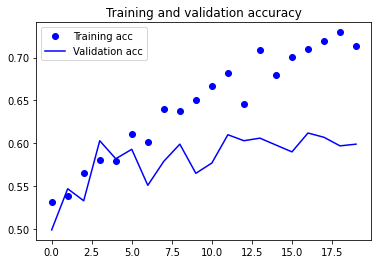

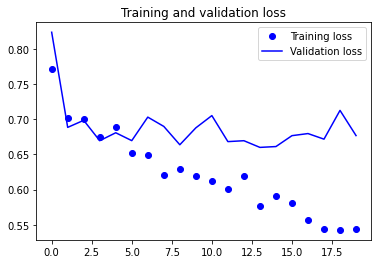

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Classify the data using ConvNets

In [ ]:
#Build a CNN model to classify the data into cats and dogs
#The model Architecture is as follows:
  #1. conv layer with 32 filters of size (3,3) and relu activation
  #2. max pooling layer with filter size (2,2), stride= 2
  #3. conv layer with 64 filters of size (3,3) and relu activation
  #4. max pooling layer with filter size (2,2), stride= 2
  #5. conv layer with 128 filters of size (3,3) and relu activation
  #6. max pooling layer with filter size (2,2), stride= 2
  #7. conv layer with 128 filters of size (3,3) and relu activation
  #8. max pooling layer with filter size (2,2), stride= 2
  #9. Dense Layer with 512 neurons and relu activation
  #10.Output layer
#Train the model
#plot loss and accuracy curves
#the validation accuracy is about 70%

In [ ]:
#Normalize images pixels values in range [0,1]
x_train_CN = (x_train.astype('float32') / 255)
x_test_CN = (x_test.astype('float32') / 255)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)    

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          x_train_CN, y_train ,epochs=20, batch_size = 64,
          validation_data=(x_test_CN,y_test))

Epoch 1/20
32/32 [==============================] - 4s 79ms/step - loss: 0.8325 - accuracy: 0.5120 - val_loss: 0.6917 - val_accuracy: 0.5890
Epoch 2/20
32/32 [==============================] - 2s 63ms/step - loss: 0.6959 - accuracy: 0.5460 - val_loss: 0.6965 - val_accuracy: 0.5010
Epoch 3/20
32/32 [==============================] - 2s 64ms/step - loss: 0.7000 - accuracy: 0.5460 - val_loss: 0.6988 - val_accuracy: 0.5140
Epoch 4/20
32/32 [==============================] - 2s 64ms/step - loss: 0.6752 - accuracy: 0.6115 - val_loss: 0.7194 - val_accuracy: 0.5450
Epoch 5/20
32/32 [==============================] - 2s 68ms/step - loss: 0.6468 - accuracy: 0.6320 - val_loss: 0.6224 - val_accuracy: 0.6670
Epoch 6/20
32/32 [==============================] - 2s 65ms/step - loss: 0.6310 - accuracy: 0.6640 - val_loss: 0.6372 - val_accuracy: 0.6170
Epoch 7/20
32/32 [==============================] - 2s 64ms/step - loss: 0.5670 - accuracy: 0.7065 - val_loss: 0.7935 - val_accuracy: 0.6040
Epoch 8/20
32

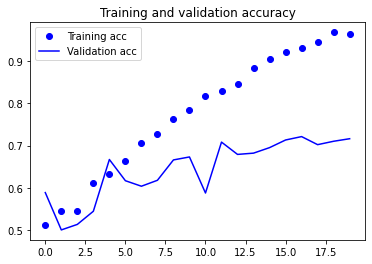

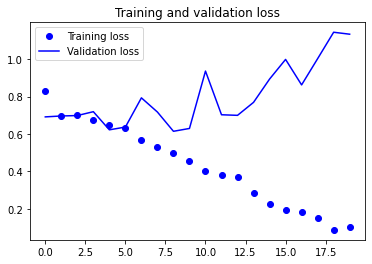

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Dropout and Data Augmentation

In [1]:
#Using dropout and Data Augmentation to enhance the model performance
#the validation accuracy is about 75%

In [ ]:
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainAug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
          trainAug.flow(x_train_CN, y_train , batch_size = 32),
          validation_data=(x_test_CN,y_test), epochs=20,)

Epoch 1/20
63/63 [==============================] - 11s 163ms/step - loss: 0.9925 - accuracy: 0.5115 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 10s 156ms/step - loss: 0.7013 - accuracy: 0.5140 - val_loss: 0.6922 - val_accuracy: 0.4990
Epoch 3/20
63/63 [==============================] - 11s 169ms/step - loss: 0.7034 - accuracy: 0.5450 - val_loss: 0.6783 - val_accuracy: 0.5820
Epoch 4/20
63/63 [==============================] - 10s 156ms/step - loss: 0.6711 - accuracy: 0.6010 - val_loss: 0.6749 - val_accuracy: 0.5920
Epoch 5/20
63/63 [==============================] - 10s 156ms/step - loss: 0.6509 - accuracy: 0.6230 - val_loss: 0.6493 - val_accuracy: 0.6260
Epoch 6/20
63/63 [==============================] - 11s 172ms/step - loss: 0.6434 - accuracy: 0.6590 - val_loss: 0.6464 - val_accuracy: 0.6460
Epoch 7/20
63/63 [==============================] - 10s 157ms/step - loss: 0.6078 - accuracy: 0.6650 - val_loss: 0.6095 - val_accuracy: 0.6510

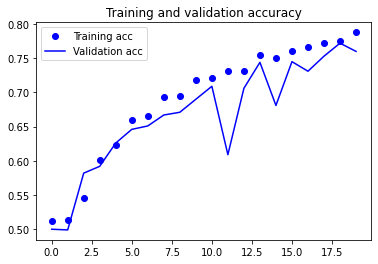

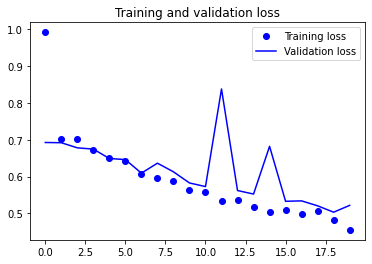

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Transfer Learning (VGG16)

In [ ]:
#Build a model with the help of a pretrained network (VGG16)
#The model Architecture is as follows:
  #1. the conv base of VGG16 (non trainable)
  #2. Dense Layer with 256 neurons and relu activation
  #3. Output layer
#Train the model
#plot loss and accuracy curves
#the validation accuracy is about 90%

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_10 (Dense)            (None, 256)               2097408   
                                                                 
 dense_11 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
          x_train_CN, y_train ,epochs=20, batch_size = 16,
          validation_data=(x_test_CN,y_test))

Epoch 1/20
125/125 [==============================] - 10s 73ms/step - loss: 0.4939 - acc: 0.7980 - val_loss: 0.3876 - val_acc: 0.8440
Epoch 2/20
125/125 [==============================] - 10s 84ms/step - loss: 0.3287 - acc: 0.8740 - val_loss: 0.3246 - val_acc: 0.8600
Epoch 3/20
125/125 [==============================] - 8s 65ms/step - loss: 0.2686 - acc: 0.9035 - val_loss: 0.3052 - val_acc: 0.8740
Epoch 4/20
125/125 [==============================] - 8s 65ms/step - loss: 0.2347 - acc: 0.9160 - val_loss: 0.2829 - val_acc: 0.8790
Epoch 5/20
125/125 [==============================] - 8s 66ms/step - loss: 0.2083 - acc: 0.9285 - val_loss: 0.2713 - val_acc: 0.8850
Epoch 6/20
125/125 [==============================] - 8s 68ms/step - loss: 0.1903 - acc: 0.9385 - val_loss: 0.2663 - val_acc: 0.8790
Epoch 7/20
125/125 [==============================] - 8s 67ms/step - loss: 0.1741 - acc: 0.9415 - val_loss: 0.2583 - val_acc: 0.8870
Epoch 8/20
125/125 [==============================] - 9s 68ms/step 

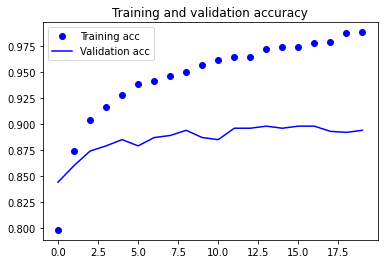

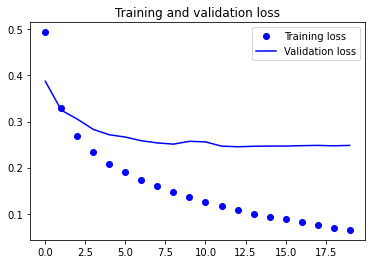

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Data Augmentation with Transfer Learning

In [2]:
#using Data Augmentation to enhance the model performance
#the validation accuracy is about 97%

In [ ]:
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainAug = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.1)

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_48 (Dense)            (None, 256)               2097408   
                                                                 
 dense_49 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 8192)              0         
                                                                 
 dense_48 (Dense)            (None, 256)               2097408   
                                                                 
 dense_49 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(
          trainAug.flow(x_train_CN, y_train , batch_size = 8),
          validation_data=(x_test_CN,y_test), epochs=20,)

Epoch 1/20
250/250 [==============================] - 16s 60ms/step - loss: 0.4581 - acc: 0.7990 - val_loss: 0.4580 - val_acc: 0.7730
Epoch 2/20
250/250 [==============================] - 14s 57ms/step - loss: 0.2862 - acc: 0.8755 - val_loss: 0.3322 - val_acc: 0.8520
Epoch 3/20
250/250 [==============================] - 14s 57ms/step - loss: 0.2774 - acc: 0.8740 - val_loss: 0.2521 - val_acc: 0.8940
Epoch 4/20
250/250 [==============================] - 14s 57ms/step - loss: 0.2393 - acc: 0.9010 - val_loss: 0.2463 - val_acc: 0.9000
Epoch 5/20
250/250 [==============================] - 15s 61ms/step - loss: 0.2263 - acc: 0.9050 - val_loss: 0.2500 - val_acc: 0.9030
Epoch 6/20
250/250 [==============================] - 14s 57ms/step - loss: 0.2293 - acc: 0.9050 - val_loss: 0.2417 - val_acc: 0.9000
Epoch 7/20
250/250 [==============================] - 14s 57ms/step - loss: 0.2192 - acc: 0.9130 - val_loss: 0.2378 - val_acc: 0.9040
Epoch 8/20
250/250 [==============================] - 14s 57ms

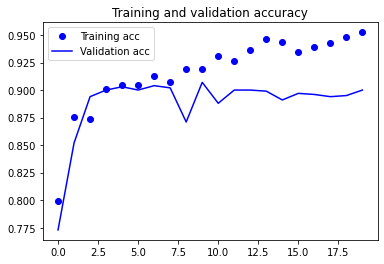

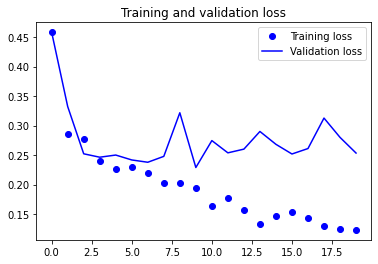

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()